In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Salary_Data.csv")
len(df)

30

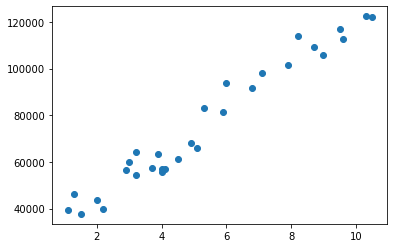

In [3]:
plot = plt.scatter(x = df["YearsExperience"], y = df["Salary"])

In [4]:
#Pytorch


data = df.to_numpy() #
x = data[:,0].reshape(len(df),1)
y = data[:,1].reshape(len(df),1)

scaler_y  = StandardScaler()
scaler_y.fit(y)
y = scaler_y.transform(y)

scaler_x  = StandardScaler()
scaler_x.fit(x)
x = scaler_x.transform(x)

inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

model = nn.Linear(1,1)

criterion =  nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
print(x,y)

[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]
 [ 1.85889428]] [[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]
 [-0.71830716]
 [-0.58815781]
 [-0.79981746]
 [-0.42881019]
 [-0.69801306]
 [-0.47433279]
 [-0.74976858]
 [-0.70662043]
 [-0.70201994]
 [-0.55250402]
 [-0.29921736]
 [-0.37004264]
 [ 0.26285865]
 [ 0.19885989]
 [ 0.66547573]
 [ 0.58377993]
 [ 0.82623317]
 [ 0.93861127]
 [ 1.40274136]
 [ 1.24020308]
 [ 1.09740238]
 [ 1.51986835]
 [ 1.3590738 ]
 [ 1.72102849]
 [ 1.70177321]]


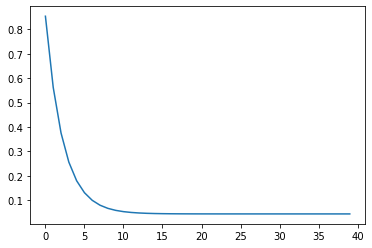

In [5]:
n_epochs = 40
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
plt.plot(losses)



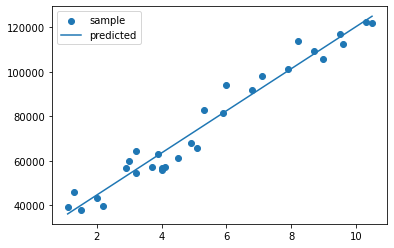

In [6]:
predicted = model(inputs).detach().numpy()
predicted = scaler_y.inverse_transform(predicted)
plt.scatter(x = df["YearsExperience"], y = df["Salary"], label = "sample")
plt.plot(df["YearsExperience"],predicted ,label = "predicted")
plt.legend()
plt.show()